# 🧠 **Alzheimer’s MRI Disease Classification** 🏥  

## 📌 **What is Alzheimer’s Disease?**  
Alzheimer’s is a **progressive brain disorder** that causes **memory loss, confusion, and difficulty in thinking**. It is the **leading cause of dementia**, affecting millions worldwide. Over time, it worsens, making daily life challenging.  

## 🔍 **Why is Early Detection Important?**  
✅ **Slows Disease Progression:** Early diagnosis allows better symptom management.  
✅ **Better Planning:** Helps patients and families prepare for the future.  
✅ **Access to Clinical Trials:** Increases chances of trying new treatments.  
✅ **Reduces Healthcare Costs:** Early intervention lowers medical expenses.  

## 💡 **How Can AI Help?**  
Using **MRI scans and Deep Learning (CNNs)**, we can **automate Alzheimer’s detection**, making diagnosis **faster and more accurate**.  

🎯 **Goal:** Build a **CNN model** to classify MRI scans into different stages of Alzheimer’s disease. 🚀  

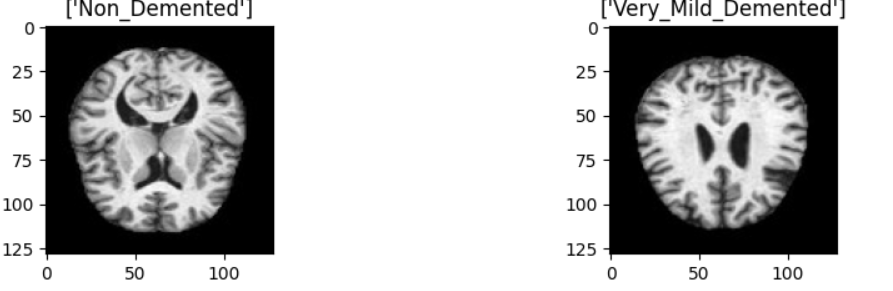
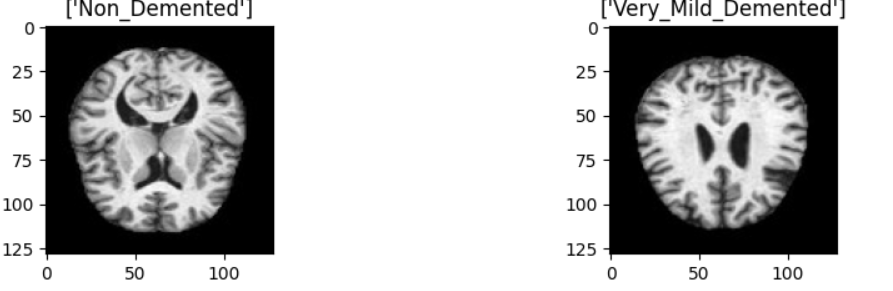

# 📂 **Dataset Overview**  

  
This dataset contains **MRI scans** for classifying different stages of Alzheimer’s disease. The images are stored in **Parquet format**, where each row represents an image in a byte-encoded format.


## 🔍 **Dataset Contents**  
✅ **MRI Images:** Brain scans converted to NumPy arrays.  
✅ **Labels:** Four categories indicating the stage of Alzheimer’s.  
✅ **Train & Test Split:** Predefined train and test datasets.  

## 🏷 **Class Labels**  
Each MRI scan is classified into **one of four categories**:  

| Label | Class Name             | Description |
|-------|------------------------|-------------|
| **0** | Mild Demented          | Early signs of dementia. |
| **1** | Moderate Demented      | Noticeable memory loss and confusion. |
| **2** | Non Demented           | Healthy brain, no signs of Alzheimer’s. |
| **3** | Very Mild Demented     | Minimal symptoms, slight cognitive decline. |

This structured dataset helps in training a **Deep Learning model (CNN)** to classify MRI scans accurately. 🧠✨  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = "/kaggle/input/alzheimer-mri-disease-classification-dataset/Alzheimer MRI Disease Classification Dataset/Data/train-00000-of-00001-c08a401c53fe5312.parquet"
test = "/kaggle/input/alzheimer-mri-disease-classification-dataset/Alzheimer MRI Disease Classification Dataset/Data/test-00000-of-00001-44110b9df98c5585.parquet"


df_train = pd.read_parquet(train)
df_test = pd.read_parquet(test)



In [3]:
#  each image is directly stored as compressed JPEG byte data instead of file paths.
df_train.head()
#this image data is stored as dict key:value key=byte,value=

,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2


<h2>Data Preprocessing</h2>

The dataset stores MRI scan images in Parquet format, where images are saved as byte strings inside a dictionary. Since deep learning models require numerical image arrays, we need to convert these byte-encoded images into usable grayscale images.

* How It Works?
* Extracts the byte string from the dictionary.
* Converts bytes into a NumPy array (np.frombuffer).
* Decodes it into an image using cv2.imdecode(), ensuring it’s in grayscale mode.
* If the input is not a valid dictionary, it raises an error.

In [4]:
import cv2
def dict_to_image(image_dict):
    if isinstance(image_dict, dict) and 'bytes' in image_dict:
        byte_string = image_dict['bytes']
        nparr = np.frombuffer(byte_string, np.uint8)
        img = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)
        return img
    else:
        raise TypeError(f"Expected dictionary with 'bytes' key, got {type(image_dict)}")

We can apply this function to transform all images in the dataset

In [5]:
df_train['img_arr'] = df_train['image'].apply(dict_to_image)
df_train.drop("image", axis=1, inplace=True)
df_train.head()

,label,img_arr
0,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [6]:
# Create a dictionary to map labels to class names
label_mapping = {
    0: "Mild_Demented",
    1: "Moderate_Demented",
    2: "Non_Demented",
    3: "Very_Mild_Demented"
}


df_train['class_name'] = df_train['label'].map(label_mapping)


df_train.head()


,label,img_arr,class_name
0,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Non_Demented
1,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Mild_Demented
2,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Very_Mild_Demented
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Very_Mild_Demented
4,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Non_Demented


<h3>Explore data</h3>

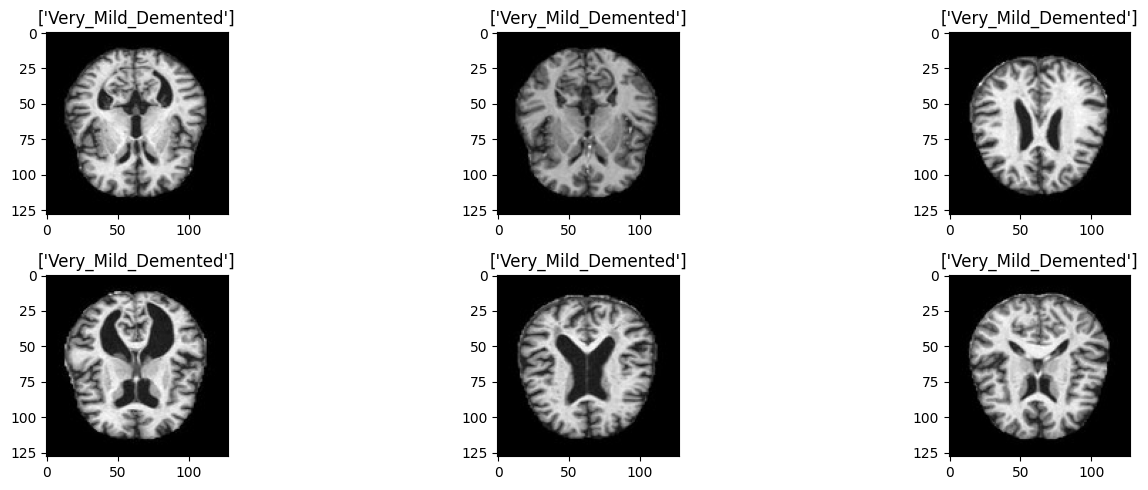

In [7]:

fig, ax = plt.subplots(2, 3, figsize=(15, 5))
axs = ax.flatten()
for axes in axs:
    rand = np.random.randint(0, len(df_train))
    axes.imshow(df_train.iloc[rand]['img_arr'], cmap="gray")
    axes.set_title([df_train.iloc[rand]['class_name']])
plt.tight_layout()
plt.show()



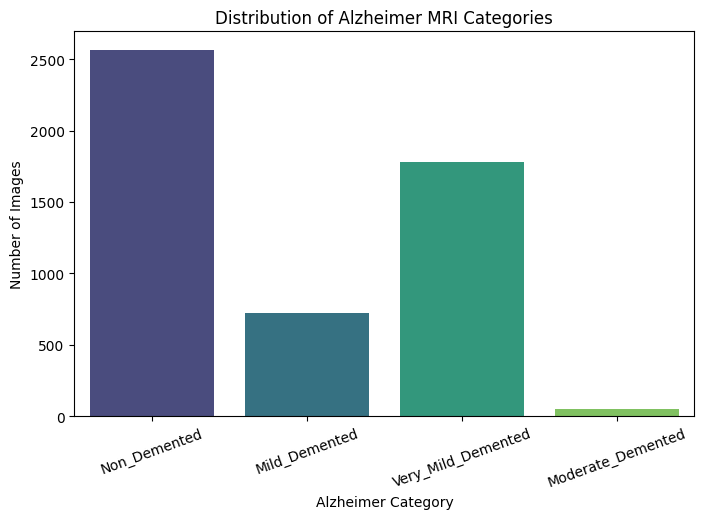

In [8]:
import seaborn as sns



plt.figure(figsize=(8, 5))

# Countplot to visualize the distribution of classes
sns.countplot(data=df_train, x='class_name', palette="viridis")

# Add labels and title
plt.xlabel("Alzheimer Category")
plt.ylabel("Number of Images")
plt.title("Distribution of Alzheimer MRI Categories")
plt.xticks(rotation=20)  


plt.show()


In [9]:
df_train['class_name'].value_counts()


class_name
Non_Demented          2566
Very_Mild_Demented    1781
Mild_Demented          724
Moderate_Demented       49
Name: count, dtype: int64

*dataset is imbalanced because non_demented and ver_mild_demented dominate the dataset while moderate_demented is extremly low* 


In [10]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df_train, test_size=0.2, stratify=df_train['class_name'], random_state=42)


In [11]:
train_df.shape,val_df.shape

((4096, 3), (1024, 3))

* Normalize images:
When working with image data, pixel values typically range from 0 to 255 
(since images are stored as 8-bit integers). Normalizing them by dividing by 255 scales these values between 0 and 1.


In [12]:
train_df['img_arr'] = train_df['img_arr'].apply(lambda x: x / 255.0)
val_df['img_arr'] = val_df['img_arr'].apply(lambda x: x / 255.0)

In [13]:
print("Training Set Class Distribution:\n", train_df['class_name'].value_counts())
print("\nValidation Set Class Distribution:\n", val_df['class_name'].value_counts())


Training Set Class Distribution:
 class_name
Non_Demented          2053
Very_Mild_Demented    1425
Mild_Demented          579
Moderate_Demented       39
Name: count, dtype: int64

Validation Set Class Distribution:
 class_name
Non_Demented          513
Very_Mild_Demented    356
Mild_Demented         145
Moderate_Demented      10
Name: count, dtype: int64


<h1>Model Building</h1>

<h1><u>Baseline model with  CNN:</h1>


In [14]:
# ResNet18 기반 Alzheimer MRI 분류 모델 + 클래스 가중치 + Augmentation 포함
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score
from torchvision import models, transforms
import numpy as np

# 이미지 정규화 및 텐서 변환
X_train = np.stack(train_df['img_arr'].values).reshape(-1, 128, 128, 1).astype(np.float32) / 255.0
X_val = np.stack(val_df['img_arr'].values).reshape(-1, 128, 128, 1).astype(np.float32) / 255.0

y_train = train_df['label'].values
y_val = val_df['label'].values

# 텐서 변환
X_train_tensor = torch.tensor(X_train).permute(0, 3, 1, 2)  # (N, 1, 128, 128)
X_val_tensor = torch.tensor(X_val).permute(0, 3, 1, 2)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# Dataset & DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# ResNet18 기반 모델 정의
model = models.resnet18(pretrained=True)
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)  # 흑백 이미지 대응
model.fc = nn.Linear(model.fc.in_features, 4)  # 4-class 분류

# 장비 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# 클래스 가중치 계산 및 손실 함수 설정
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)

# 옵티마이저 설정
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Early stopping 설정
patience = 7
best_val_loss = float('inf')
early_stop_counter = 0

# 학습 루프
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # 검증 단계
    model.eval()
    val_loss = 0.0
    y_pred, y_true = [], []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, pred = torch.max(outputs, 1)
            y_pred.extend(pred.cpu().numpy())
            y_true.extend(labels.cpu().numpy())

    avg_val_loss = val_loss / len(val_loader)
    acc = accuracy_score(y_true, y_pred)
    print(f"Epoch {epoch+1}, Train Loss: {running_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Val Acc: {acc:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model_state = model.state_dict()
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print("Early stopping triggered")
            model.load_state_dict(best_model_state)
            break

# 학습 종료 후 확인
print("예측 클래스 분포:", np.unique(y_pred, return_counts=True))


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 237MB/s]


Epoch 1, Train Loss: 136.7769, Val Loss: 0.9104, Val Acc: 0.5303
Epoch 2, Train Loss: 74.4485, Val Loss: 0.6768, Val Acc: 0.7139
Epoch 3, Train Loss: 37.7930, Val Loss: 1.1795, Val Acc: 0.7158
Epoch 4, Train Loss: 21.1988, Val Loss: 0.3784, Val Acc: 0.8340
Epoch 5, Train Loss: 12.6428, Val Loss: 0.5353, Val Acc: 0.8213
Epoch 6, Train Loss: 14.7521, Val Loss: 0.4329, Val Acc: 0.8223
Epoch 7, Train Loss: 15.9241, Val Loss: 0.4302, Val Acc: 0.8193
Epoch 8, Train Loss: 6.9105, Val Loss: 0.2998, Val Acc: 0.8896
Epoch 9, Train Loss: 6.8414, Val Loss: 0.3275, Val Acc: 0.9014
Epoch 10, Train Loss: 1.9515, Val Loss: 0.3055, Val Acc: 0.9170
Epoch 11, Train Loss: 1.4727, Val Loss: 0.2860, Val Acc: 0.9248
Epoch 12, Train Loss: 2.2997, Val Loss: 0.3065, Val Acc: 0.9131
Epoch 13, Train Loss: 1.9922, Val Loss: 0.4426, Val Acc: 0.9268
Epoch 14, Train Loss: 7.8220, Val Loss: 1.0034, Val Acc: 0.7305
Epoch 15, Train Loss: 65.1312, Val Loss: 1.2604, Val Acc: 0.6084
Epoch 16, Train Loss: 20.3213, Val Loss:

<Figure size 600x500 with 0 Axes>

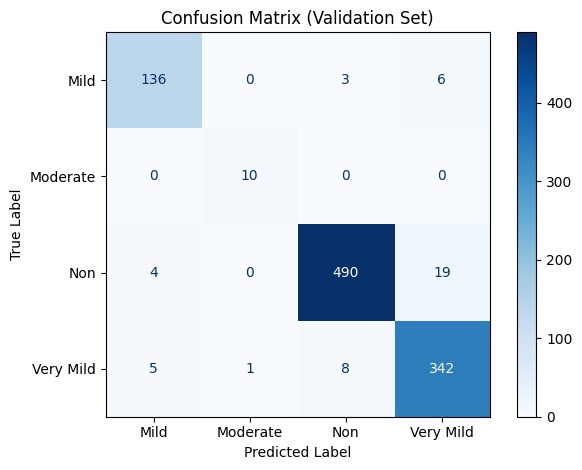

In [15]:
# Confusion Matrix 시각화
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 전체 validation set에서 예측
model.eval()
y_pred, y_true = [], []
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_pred.extend(preds.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# confusion matrix 계산
cm = confusion_matrix(y_true, y_pred)
class_names = ['Mild', 'Moderate', 'Non', 'Very Mild']

# 시각화
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix (Validation Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.grid(False)
plt.tight_layout()
plt.show()


In [16]:
# Precision / Recall / F1-score 분석
from sklearn.metrics import classification_report

# 클래스 이름 정의
class_names = ['Mild', 'Moderate', 'Non', 'Very Mild']

# classification report 생성
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)
print("\nClassification Report:\n")
print(report)



Classification Report:

              precision    recall  f1-score   support

        Mild     0.9379    0.9379    0.9379       145
    Moderate     0.9091    1.0000    0.9524        10
         Non     0.9780    0.9552    0.9665       513
   Very Mild     0.9319    0.9607    0.9461       356

    accuracy                         0.9551      1024
   macro avg     0.9392    0.9634    0.9507      1024
weighted avg     0.9556    0.9551    0.9552      1024



**Moderate 데이터가 너무 적기 때문에 데이터 보강을 하면 더 좋을 것 같다!**

In [17]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 101.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=c6f9bd43830d18b88f4f4750edc6ef64fb01bdde0112dfa173adff51fee58221
  Stored in directory: /root/.cache/pip/wheels/3d/b6/be/e13cccebb2aa8855f678b02ad449e803de1dfbe75853c34b3e
Successfully built grad-cam


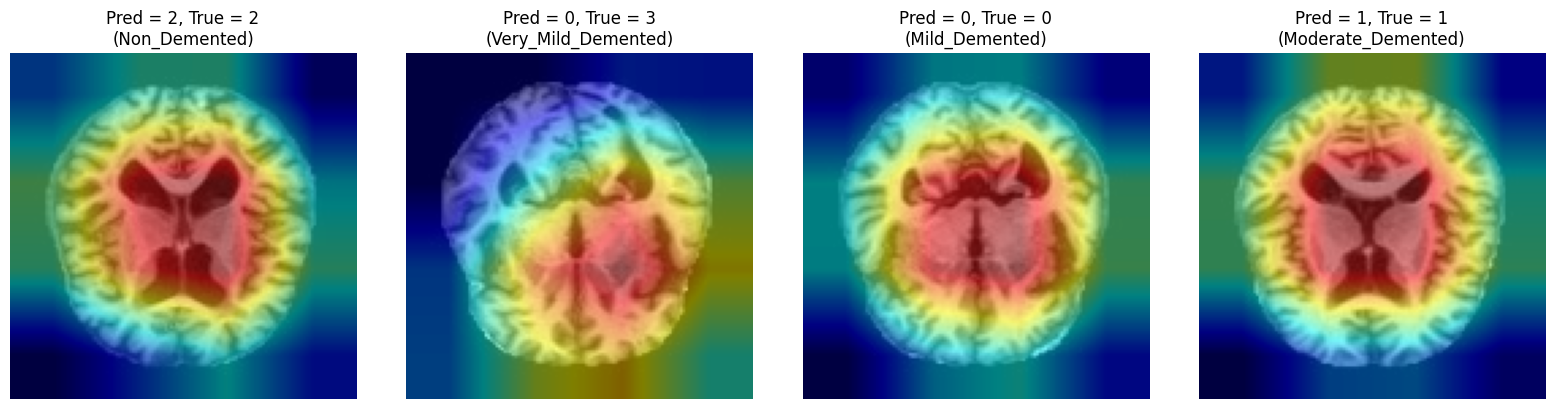

In [18]:
# Grad-CAM: 클래스별 1장씩 시각화
import torch
import numpy as np
import matplotlib.pyplot as plt
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

# label-to-class mapping
class_names = {
    0: "Mild_Demented",
    1: "Moderate_Demented",
    2: "Non_Demented",
    3: "Very_Mild_Demented"
}

# 클래스별 샘플 인덱스 찾기
samples_per_class = {}
for i in range(len(y_val)):
    label = y_val[i]
    if label not in samples_per_class:
        samples_per_class[label] = i
    if len(samples_per_class) == 4:
        break

# Grad-CAM 시각화
model.eval()
target_layers = [model.layer4[-1]] if hasattr(model, 'layer4') else [model.conv2]
cam = GradCAM(model=model, target_layers=target_layers)

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for idx, (label, sample_idx) in enumerate(samples_per_class.items()):
    img_tensor = X_val_tensor[sample_idx].unsqueeze(0).to(device)
    img_np = img_tensor.squeeze().cpu().numpy()
    img_np_norm = (img_np - img_np.min()) / (img_np.max() - img_np.min())
    img_rgb = np.stack([img_np_norm]*3, axis=-1)

    output = model(img_tensor)
    pred_class = torch.argmax(output).item()

    grayscale_cam = cam(input_tensor=img_tensor, targets=[ClassifierOutputTarget(pred_class)])
    grayscale_cam = grayscale_cam[0]

    visualization = show_cam_on_image(img_rgb, grayscale_cam, use_rgb=True)
    axs[idx].imshow(visualization)
    axs[idx].set_title(f"Pred = {pred_class}, True = {label}\n({class_names[label]})")
    axs[idx].axis('off')

plt.tight_layout()
plt.show()


In [19]:
!pip install grad-cam

Grad-CAM을 통해 확인한 결과, 모델은 Non-Demented, Mild, Moderate Demented MRI에서 중심부 및 해마 인근 구조에 강한 시각적 주의를 보였다. 특히 Mild 및 Moderate Demented에 대해 확실한 예측을 수행하며, 시각적 주의 영역도 병변이 나타나기 쉬운 영역과 일치하였다. 반면 Very Mild Demented는 Non-Demented와 유사한 구조로 인해 혼동되어 오분류되었으며, 이는 데이터의 시각적 경계가 모호함에 기인한 자연스러운 결과로 해석할 수 있다.

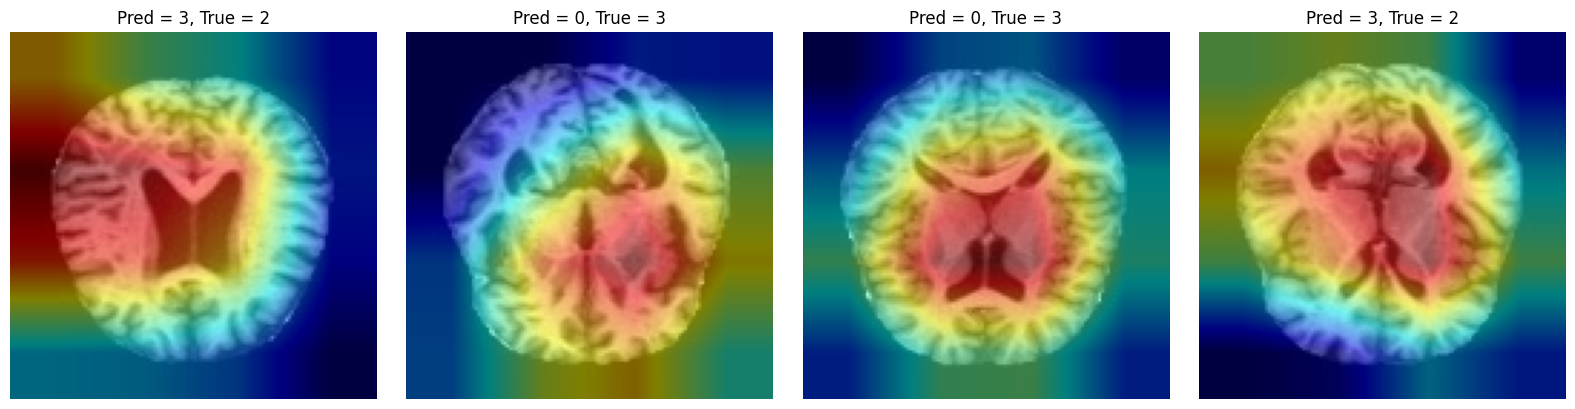

In [20]:
# Grad-CAM: 오분류 샘플 자동 시각화
import torch
import numpy as np
import matplotlib.pyplot as plt
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

# 오분류 샘플 인덱스 수집
model.eval()
y_pred, y_true = [], []
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_pred.extend(preds.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

wrong_indices = [i for i in range(len(y_val)) if y_pred[i] != y_true[i]]

# 최대 4개 오분류 샘플 시각화
target_layers = [model.layer4[-1]] if hasattr(model, 'layer4') else [model.conv2]
cam = GradCAM(model=model, target_layers=target_layers)

fig, axs = plt.subplots(1, min(4, len(wrong_indices)), figsize=(16, 4))
if len(wrong_indices) == 1:
    axs = [axs]  # 단일 축일 경우 리스트로 변환

for idx, wrong_i in enumerate(wrong_indices[:4]):
    img_tensor = X_val_tensor[wrong_i].unsqueeze(0).to(device)
    label = y_val[wrong_i]
    pred = y_pred[wrong_i]

    img_np = img_tensor.squeeze().cpu().numpy()
    img_np_norm = (img_np - img_np.min()) / (img_np.max() - img_np.min())
    img_rgb = np.stack([img_np_norm]*3, axis=-1)

    grayscale_cam = cam(input_tensor=img_tensor, targets=[ClassifierOutputTarget(pred)])
    grayscale_cam = grayscale_cam[0]

    visualization = show_cam_on_image(img_rgb, grayscale_cam, use_rgb=True)
    axs[idx].imshow(visualization)
    axs[idx].set_title(f"Pred = {pred}, True = {label}")
    axs[idx].axis('off')

plt.tight_layout()
plt.show()


통합 분석
모델은 Very Mild vs Non 또는 Very Mild vs Mild에서 혼동을 많이 겪고 있음

이는 실제 의사들도 진단이 어려운 구간이며, 데이터의 시각적 경계가 모호하기 때문

일부 예측은 중심이 아닌 뇌 외곽 위주로 반응하는 경향도 보이며, 이는 보완 필요

보완 방법: Grad-CAM attention 중심화 loss 도입, 데이터 증강 추가, 깊은 모델

<h2>Prediction on Test Data</h2>

In [21]:
df_test['img_arr'] = df_test['image'].apply(dict_to_image)
df_test.drop("image", axis=1, inplace=True)

In [22]:
df_test

,label,img_arr
0,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...
1275,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1276,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1277,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1278,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [23]:
X_test = np.stack(df_test['img_arr'].values).reshape(-1, 128, 128, 1).astype(np.float32) / 255.0
X_test_tensor = torch.tensor(X_test).permute(0, 3, 1, 2)

test_dataset = torch.utils.data.TensorDataset(X_test_tensor)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)


In [24]:
# 모델 평가 모드로 전환
model.eval()
predictions = []

with torch.no_grad():
    for (inputs,) in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        predictions.extend(preds.cpu().numpy())

# 결과 저장
df_test['predicted_label'] = predictions

# (선택) 클래스 이름 붙이기
label_mapping = {
    0: "Mild_Demented",
    1: "Moderate_Demented",
    2: "Non_Demented",
    3: "Very_Mild_Demented"
}
df_test['predicted_class'] = df_test['predicted_label'].map(label_mapping)

# (선택) 결과 미리보기
print(df_test[['predicted_label', 'predicted_class']].head())

   predicted_label predicted_class
0                2    Non_Demented
1                2    Non_Demented
2                2    Non_Demented
3                2    Non_Demented
4                2    Non_Demented


In [25]:
import torch.nn.functional as F

model.eval()
with torch.no_grad():
    inputs = X_test_tensor.to(device)
    outputs = model(inputs)
    probs = F.softmax(outputs, dim=1).cpu().numpy()

print(probs[:5])


[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [26]:
import numpy as np
classes, counts = np.unique(predictions, return_counts=True)
for c, cnt in zip(classes, counts):
    print(f"Class {c} ({label_mapping[c]}): {cnt} samples")

Class 2 (Non_Demented): 1280 samples
